In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LN

# Question 1: Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.

In [14]:
#hough transform
img = cv.imread('coins_1.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (5, 5), 1.3)

row = img.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1 = 160, param2 = 35)

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        #draw the center of the circle
        center = (i[0], i[1])
        cv.circle(img, center, 1, (100, 100, 100), 1)
        #draw the whole circle
        radius = i[2]
        cv.circle(img, center, radius, (255, 0, 0), 1)

In [11]:
# blob detection
img1 = cv.imread('coins_1.jfif')
blur = cv.medianBlur(img1, 5)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# parameter setting
params = cv.SimpleBlobDetector_Params()

# turn off the filter
params.filterByArea = True
params.minArea = 750
params.filterByColor = True
params.blobColor = 255
params.filterByConvexity = False
params.filterByInertia = False

# detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# draw
im_keypoints = cv.drawKeypoints(img1, keypoints, np.array([]), (0, 0, 255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [15]:
cv.imshow('result', np.hstack((img, im_keypoints)))
cv.waitKey(0)
cv.destroyAllWindows()

Hough Transform plotted the center of the object

Blob Detection have closer output to the groundtruth edge.

# Question 2: Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
- You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
- Apply the clustering method on 2 color space: BGR and HSV and compare the results obtained.

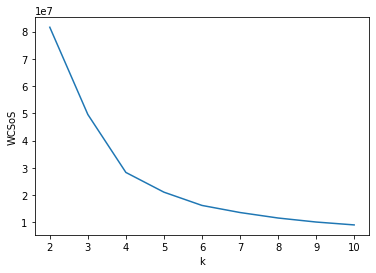

In [3]:
# k-means clustering on images

img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#reshape the image
img_reshaped = img_rgb.reshape((-1, 3))
img_reshaped = np.float32(img_reshaped)

#list to store k and WCSoS
k_list = np.array([])
WCSoS_list = np.array([])

#define criteria, attempts and test out the k value
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

for k in range(2, 10+1):
    ret, label, center = cv.kmeans(img_reshaped, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
    k_list = np.append(k_list, k)
    WCSoS_list = np.append(WCSoS_list, ret)

# plot the graph
plt.plot(k_list, WCSoS_list)
plt.xlabel('k'), plt.ylabel('WCSoS')
plt.show()

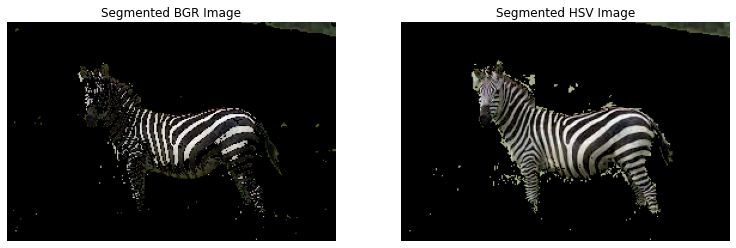

In [2]:
# Create bgr and hsv image

img = cv.imread('zebra.jfif')
img_bgr = img.copy()
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Image reshape
img_bgr_reshaped = img_bgr.reshape((-1, 3))
img_bgr_reshaped = np.float32(img_bgr_reshaped)

img_hsv_reshaped = img_hsv.reshape((-1, 3))
img_hsv_reshaped = np.float32(img_hsv_reshaped)

# Define criteria, k, attempts for both images
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 4
attempts = 10

ret, label, center = cv.kmeans(img_bgr_reshaped, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

ret2, label2, center2 = cv.kmeans(img_hsv_reshaped, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# convert center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
res_seg = res.reshape((img_bgr.shape))

center2 = np.uint8(center2)
res2 = center2[label2.flatten()]
res_seg2 = res2.reshape((img_hsv.shape))

# Define white and black for bgr
white_color = (255, 255, 255)
black_color = (0, 0, 0)

white = np.argmin(LN.norm(white_color - center, axis = 1))
white_mask = res_seg == center[white]
seg_white = img_bgr*(white_mask.astype("uint8"))

black = np.argmin(LN.norm(black_color - center, axis = 1))
black_mask = res_seg == center[black]
seg_black = img_bgr*(black_mask.astype("uint8"))

seg_bgr = cv.bitwise_or(seg_white, seg_black, mask = None)

# Define white and black for hsv
white_color_hsv = (0, 0, 255)
black_color_hsv = (0, 0, 0)

white_hsv = np.argmin(LN.norm(white_color_hsv - center2, axis = 1))
white_mask2 = res_seg2 == center2[white_hsv]
seg_white2 = img_hsv*(white_mask2.astype("uint8"))

black_hsv = np.argmin(LN.norm(black_color_hsv - center2, axis = 1))
black_mask2 = res_seg2 == center2[black_hsv]
seg_black2 = img_hsv*(black_mask2.astype("uint8"))

seg_hsv = cv.bitwise_or(seg_white2,seg_black2, mask = None)

# Display output
plt.figure(figsize = (20,20))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(seg_bgr, cv.COLOR_BGR2RGB))
plt.title('Segmented BGR Image'), plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(seg_hsv, cv.COLOR_HSV2RGB))
plt.title('Segmented HSV Image'), plt.axis("off")
plt.show()

segmentation on HSV image have better result